# Lecture Notes 2: Numpy, Timing, Plotting

# Numpy

# Basics

In [4]:
# Import the module such that we can use the built-in functionality
import numpy

# Numpy arrays

In [5]:
x = numpy.array([1, 2, 3, 4])
y = numpy.array([5, 6, 7, 8])

In [6]:
A = x + y           # element-wise addition
M = x * y           # element-wise multiplication
D = numpy.dot(x, y) # dotproduct
T = x.T             # transposing
x_tail = x[2:]      # indexing (similar to lists)

A, M, D, T, x_tail

(array([ 6,  8, 10, 12]),
 array([ 5, 12, 21, 32]),
 70,
 array([1, 2, 3, 4]),
 array([3, 4]))

In [7]:
# compare this to operations on lists

x_list = [1, 2, 3, 4]
y_list = [5, 6, 7, 8]

print(x_list + y_list)
print(x_list * y_list) # -> raise Exception

[1, 2, 3, 4, 5, 6, 7, 8]


TypeError: can't multiply sequence by non-int of type 'list'

## Equivalent operations with lists

In [8]:
A_list = [x + y for x, y in zip(x,y)]
M_list = [x * y for x, y in zip(x,y)]
D_list = sum([x * y for x, y in zip(x,y)])

A_list, M_list, D_list

([6, 8, 10, 12], [5, 12, 21, 32], 70)

**Oberservation:** Results are the same, but the Numpy syntax is much more readabel (i.e. more compact) than the Python syntax for the same vector operations.

### Shapes of arrays

In [9]:
print(A.shape, M.shape, D.shape)

(4,) (4,) ()


## Matrices

In [10]:
A = numpy.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

In [11]:
print(A)
print(10 * "-")
print(A.shape)

[[1 2 3]
 [4 5 6]]
----------
(2, 3)


In [12]:
# Elementwise multiplication
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [13]:
# Matrix-matrix multiplication
numpy.dot(A, A.T)

array([[14, 32],
       [32, 77]])

**Observation:** Unlike Matlab, "*" denotes an elemtn-wise multiplication. Matrix multiplication is instead implemented by the function "dot".

In [14]:
numpy.dot(A, A) # -> raises Exception

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

## Performance evaluation

To verify that in addition to the more compact syntax, Numpy also provides  computational benefit over standard Python, we compare the running time o f a similar computation performed in pure Python and in Numpy. Teh module "time" provdides a function "clock" to measure the current time.

In [15]:
import time 
time.process_time() # instead of time.clock()

8.432001564

we now wait a little bit...

In [16]:
time.process_time() # instead of time.clock()

8.485393992

and can observed that the value is higher than before (itme has passed). We now define two functions to test the speed of matrix multiplication for two $n \times n$ matrices

In [17]:
# pure Python implementation 

def benchmark_python(n):
    
    #initialiyation
    X = numpy.ones((n, n))
    Y = numpy.ones((n, n))
    Z = numpy.zeros((n, n))
    
    # actual matrix multiplication
    start = time.clock()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i, j] = X[i, k] + Y[k, j]
    end = time.clock()
    
    return end - start

In [18]:
# Numpy implementation

def benchmark_numpy(n):
    
    #initialization 
    X = numpy.ones((n, n))
    Y = numpy.ones((n, n))
    Z = numpy.zeros((n, n))
    
    # actual matrix multiplication
    start = time.clock()
    Z = numpy.dot(X,Y)
    #end = time.process_time()
    end = time.clock()
    
    return end-start


Evaluating this function for $n=100$ iterations, we can observe that Numpy is much faster than pure Python. 

In [19]:
num_iterations = 100
benchmark_python(num_iterations), benchmark_numpy(num_iterations)

(2.2239059999999995, 0.03048800000000007)

In [20]:
#### Common alternative way of importing Numpy: alias "np"
import numpy as np
print(np.ones((3, 3)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Plotting

In machine learning, it is often necessary to visualiye the data, or to plot properties of algorithms such as their accuracy or their speed. For this, we can make use of the matplotlib library, which we load with the following sequence of commands.

In [21]:
import matplotlib
import matplotlib.pyplot as plt
# Neede in Jupyter Noebook
%matplotlib inline
# magic command

See also: 
https://ipython.readthedocs.io/en/stable/interactive/plotting.html


# Basic Plot

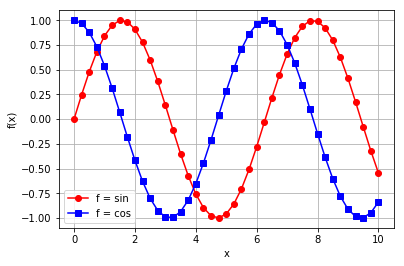

In [22]:
x = np.arange(0, 10.001, 0.25)
y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, 'o-', color='red', label='f = sin')
plt.plot(x, z, 's-', color='blue', label='f = cos')

plt.legend()

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

#### Plotting a performance curve for matrix multiplication

We runt the computation with different paramerters (e.g. size of input arrays)


Ref:

Shortcut key for changing code cell to markdown cell in jupyter notebook
https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook

kidpixo/jupyter_shortcuts.md

https://gist.github.com/kidpixo/f4318f8c8143adee5b40

In [23]:
N = [1, 2, 4, 8, 16, 32, 64, 128, 256]

py_t = [benchmark_python(n) for n in N]
np_t = [benchmark_numpy(n) for n in N]

Then, we render the plot

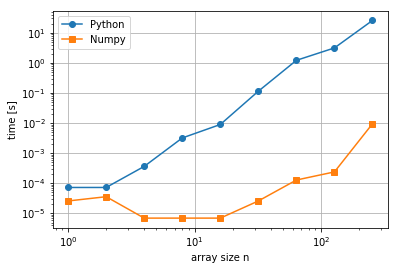

In [24]:
plt.plot(N, py_t, 'o-', label='Python')
plt.plot(N, np_t, 's-', label='Numpy')

plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('array size n')
plt.ylabel('time [s]')

plt.legend(loc='upper left')

# Advanced Numpy

#### Special Array Initializations

Numpy arrays can be initialized to specific values (`numpy.zeros`, `numpy.ones`,...). Special numpy arrays (e.g. diagonal, identity) can be created easily.

In [25]:
A = np.zeros((3, 3))
B = np.ones((3, 3))
C = np.diag((3.0, 3.0, 3.0))
D = np.eye(3)
E = np.random.rand(3, 3)
F = np.tril(B)

print(A)
print(B)
print(C)
print(D)
print(E)
print(F)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.99238565 0.69604121 0.12021141]
 [0.39409603 0.04163137 0.33019388]
 [0.93748438 0.2303414  0.91092071]]
[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


### Array type

In [26]:
A = numpy.ones((2, 2))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (2, 2), 4, 2, dtype('float64'))

In [27]:
A = numpy.ones((3, 3, 3))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (3, 3, 3), 27, 3, dtype('float64'))

#### Casting

An array can be explicitly forced to have elements of a certain type (e.g. half-percision). When applying an operator to two arrays of different types, the returned array retains the type of the highest-persisioni input array (here, float64)

In [28]:
E = A.astype('float32')
A.dtype, E.dtype, (A + E).dtype

(dtype('float64'), dtype('float32'), dtype('float64'))

### Reshaping and transposting

In [29]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.reshape((3,2)))
print(A.ravel())
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


### Broadcasting

See also
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

![Numpy broadcasting](numpy_broadcasting.png)

In [30]:
numpy.ones((3, 2)) + 1

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [31]:
numpy.ones((3, 2)) + numpy.ones((3, 1))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [32]:
numpy.ones((3, 1)) + numpy.ones((1, 2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [33]:
numpy.ones((3, 1)) + numpy.ones((2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

### Indexing

See also https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [34]:
A = numpy.arange(30).reshape(6, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


Select rows/columns

In [35]:
print(A[3,:])
print(A[:,3])

[15 16 17 18 19]
[ 3  8 13 18 23 28]


Select window

In [36]:
print(A[1:5, 1:4]) # the end point is excluded 4 and 5 are not printed

[[ 6  7  8]
 [11 12 13]
 [16 17 18]
 [21 22 23]]


Select even rows and odd columns

In [37]:
print(A[::2,1::2])

[[ 1  3]
 [11 13]
 [21 23]]


Select column 1 and 4

In [38]:
print(A[:, [1, 4]])

[[ 1  4]
 [ 6  9]
 [11 14]
 [16 19]
 [21 24]
 [26 29]]


# Boolean Arrays

In [39]:
a = numpy.random.rand(4, 4)

print(a)

b = a > 0.5

print(50 *'-')
print(b)

print(50 *'-')
print(b.astype(int))

print(50 *'-') # print only True values in b as a List
print(a[b])

[[0.92818015 0.27108846 0.23232301 0.5113022 ]
 [0.78330403 0.55080541 0.43633658 0.24138979]
 [0.94373634 0.66383364 0.93749495 0.32715366]
 [0.13448995 0.56308267 0.22385974 0.01891459]]
--------------------------------------------------
[[ True False False  True]
 [ True  True False False]
 [ True  True  True False]
 [False  True False False]]
--------------------------------------------------
[[1 0 0 1]
 [1 1 0 0]
 [1 1 1 0]
 [0 1 0 0]]
--------------------------------------------------
[0.92818015 0.5113022  0.78330403 0.55080541 0.94373634 0.66383364
 0.93749495 0.56308267]


In [40]:
# Is any/all of the elements True?

numpy.any(b), numpy.all(b)

(True, False)

In [41]:
# Apply to specific axes only
numpy.all(b, axis=1), numpy.any(b, axis=0) 
#axis=1 Horizontal
#axis=0 Vertical

(array([False, False, False, False]), array([ True,  True,  True,  True]))

# Analyzing a Dataset

Let's load the Boston dataset (506 examples composed of 13 features each).

In [42]:
# extract two interesting features of the data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

X = boston['data']
F = boston['feature_names']

print(F)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Reduce-type operations

reduce() in Python

https://www.geeksforgeeks.org/reduce-in-python/



In [43]:
print(X.mean())                             # Global dataset mean feature value
print(50 *'-')                              

print(X[:, 0].mean())                      # Mean of first feature (CRIM)
print(50 *'-')                              

print(X.mean(axis=0), X.mean(axis=0).shape) #Mean of all features
print(50 *'-')                              

print(X.std(axis=0), X.std(axis=0).shape)   # Standard deviation of all features
print(50 *'-')                              

print(X.min(), X.max())                     # Extreme values
print(50 *'-')                              

print(X.shape, X.sum(axis=1).shape, X.sum(axis=1, keepdims=True).shape)

70.0724468257829
--------------------------------------------------
3.5937607114624512
--------------------------------------------------
[3.59376071e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01] (13,)
--------------------------------------------------
[8.58828355e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00] (13,)
--------------------------------------------------
0.0 711.0
--------------------------------------------------
(506, 13) (506,) (506, 1)


Retaining two interesting features (5 and 12)

In [44]:
X = X[:, [5, 12]]

print(X.shape)

(506, 2)


Scatter-plot the first two dimentsions

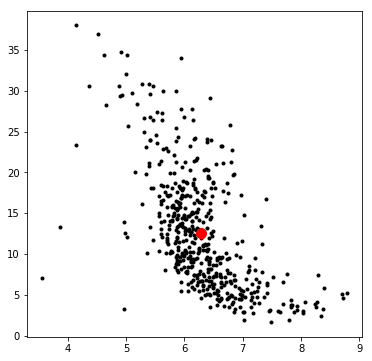

In [71]:
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], 'o', color='black', ms=3)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'o', color='red', ms=10)

#### Normalize the data


### mean function python

https://www.geeksforgeeks.org/python-statistics-mean-function/

Hint: you can simply press 'h' to get the Keyboard shortcut

#### How to normalize a Vector 

https://www.wikihow.com/Normalize-a-Vector

#### How to normalize data
Hint: look to the 'More Dummies Guides:' which is at the bottom of this article

https://medium.com/@lahorekid/a-dummies-guide-to-data-normalization-for-neural-nets-ff1998116e75


In [80]:
# normalization type is Z-score normalization
X_norm = X - X.mean(axis=0) # center around origin
X_norm /= X.std(axis=0)     # rescale features so that they have standard deviation 1 in each dimenstion
X_norm

array([[ 0.41367189, -1.0755623 ],
       [ 0.19427445, -0.49243937],
       [ 1.28271368, -1.2087274 ],
       ...,
       [ 0.98496002, -0.98304761],
       [ 0.72567214, -0.86530163],
       [-0.36276709, -0.66905833]])

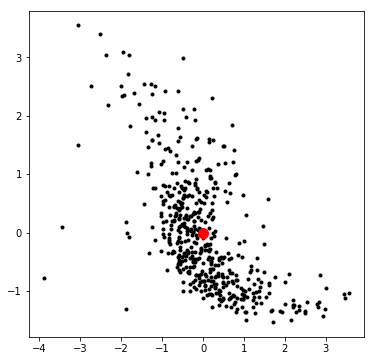

In [47]:
plt.figure(figsize=(6, 6))
plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)
plt.plot(X_norm[:, 0].mean(), X_norm[:, 1].mean(), 'o', color='red', ms=10)


#### Computing a distance matrix

Graph Theory:Distance Matrix
https://www.youtube.com/watch?v=EKCLEsFh3f0

See here:

Distance computations 
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

scipy.spatial.distance_matrix
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html

scipy.spatial.distance.cdist
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist

How can I do a line break (line continuation) in Python?
https://stackoverflow.com/questions/53162/how-can-i-do-a-line-break-line-continuation-in-python


distance matrix between points
https://community.esri.com/thread/193258-distance-matrix-between-points

Creating a Distance Matrix
https://stackoverflow.com/questions/29481485/creating-a-distance-matrix

The Distance Formula between points
https://www.mathwarehouse.com/algebra/distance_formula/index.php

In [85]:
import scipy
import scipy.spatial

D = scipy.spatial.distance.cdist(X_norm, X_norm)
D

array([[0.        , 0.62303098, 0.87918518, ..., 0.57873059, 0.37623624,
        0.87641484],
       [0.62303098, 0.        , 1.30298446, ..., 0.93052679, 0.64916082,
        0.58437106],
       [0.87918518, 1.30298446, 0.        , ..., 0.37361559, 0.65439784,
        1.7317187 ],
       ...,
       [0.57873059, 0.93052679, 0.37361559, ..., 0.        , 0.28477064,
        1.38381994],
       [0.37623624, 0.64916082, 0.65439784, ..., 0.28477064, 0.        ,
        1.10598887],
       [0.87641484, 0.58437106, 1.7317187 , ..., 1.38381994, 1.10598887,
        0.        ]])

alternative way of computing a distance matrix:


Numerical Python tricks: All there is to know about nan and inf
https://www.youtube.com/watch?v=E2xgnrrmJc8


PEP 754 -- IEEE 754 Floating Point Special Values
https://www.python.org/dev/peps/pep-0754/

In [94]:
Dalt = np.sqrt(((X_norm ** 2).sum(axis=1).reshape((1, len(X_norm))) \
      + (X_norm ** 2).sum(axis=1).reshape((len(X_norm), 1))- 2 * numpy.dot(X_norm, X_norm.T))+ 1e-7)

#we add this part to avoid nan values '+1e-7'
#why he subtracted it from D and powered it by 2 and got the mean ? 
print(((Dalt - D) ** 2).mean())

1.976417416118084e-10


#### Highlighting nearby data points

(array([  0,   0,   0, ..., 505, 505, 505]), array([  0,  39,  52, ..., 335, 338, 505]))


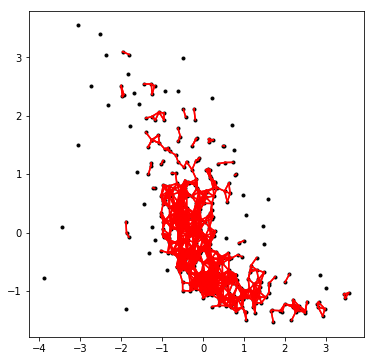

In [111]:
plt.figure(figsize=(6,6))

ind = numpy.where(D < 0.2)
print(ind)

plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)

for i1, i2 in zip(*ind):
    plt.plot([X_norm[i1, 0], X_norm[i2, 0]], [X_norm[i1, 1], X_norm[i2, 1]], color='red', alpha=1)



## Getting help

In [112]:
help(numpy.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are